importing pandas adn sys to add the path 

In [ ]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('..'))

loading the data from data folder 

In [6]:
df=pd.read_csv('../Data/data.csv')



APPENDING SCRIPT DIECTORY TO THE CODE TO IMPORT THE of EDA AND FEATURE EXTRACTION 

In [7]:
sys.path.append(os.path.abspath('../script'))

IMPORTING THE PERFORM EDA FUNCITON FORM EDA.PY 

In [8]:
from EDA import perform_eda


--- Dataset Overview ---
Number of rows: 95662
Number of columns: 16

--- Data Types ---
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

--- Summary Statistics ---
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_35670  BatchId_67019  AccountId_4841   
freq                      1             28           30893   
mean                    NaN            NaN    

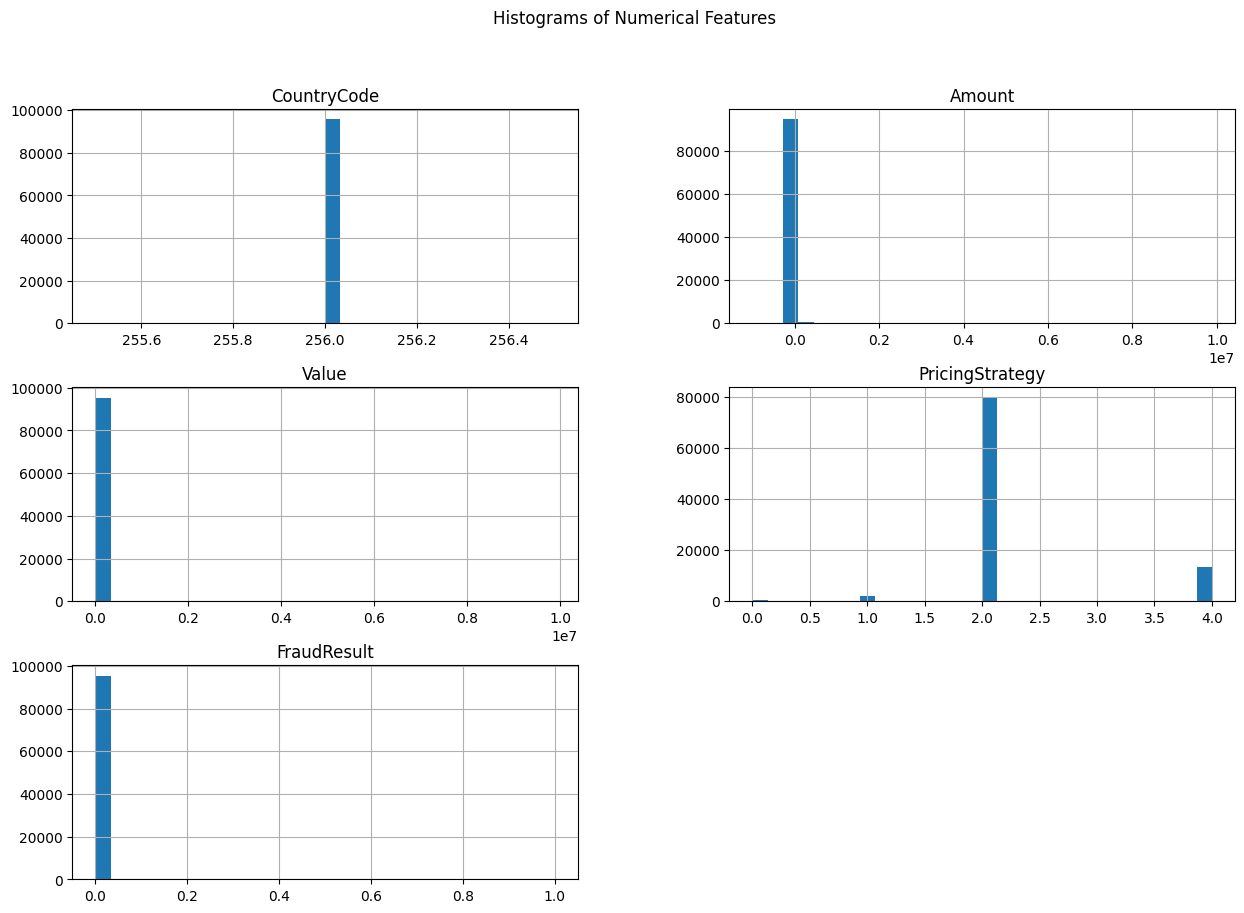


--- Distribution of Categorical Features ---


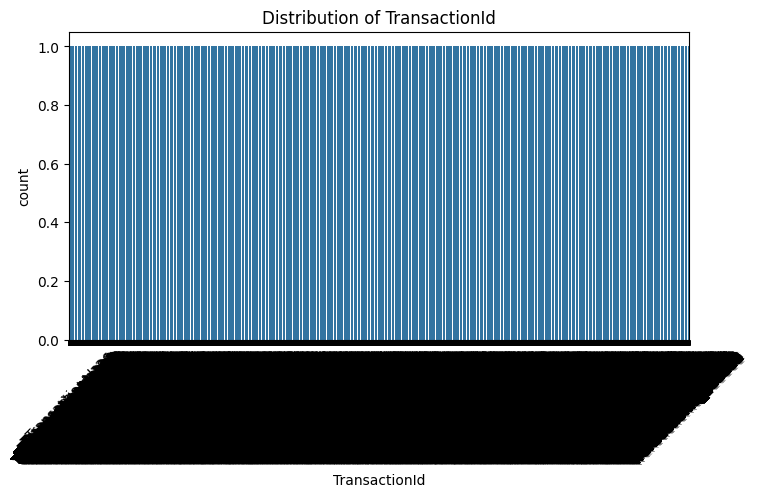

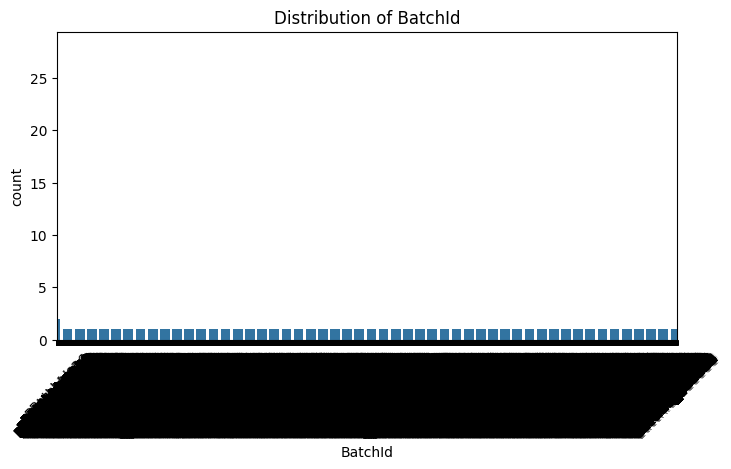

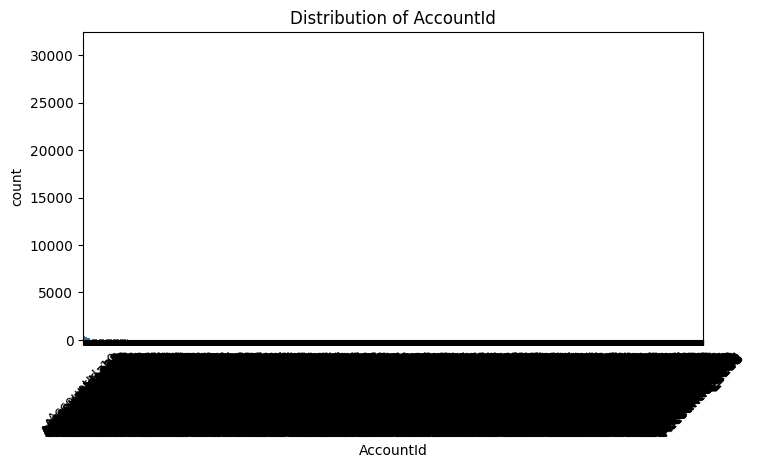

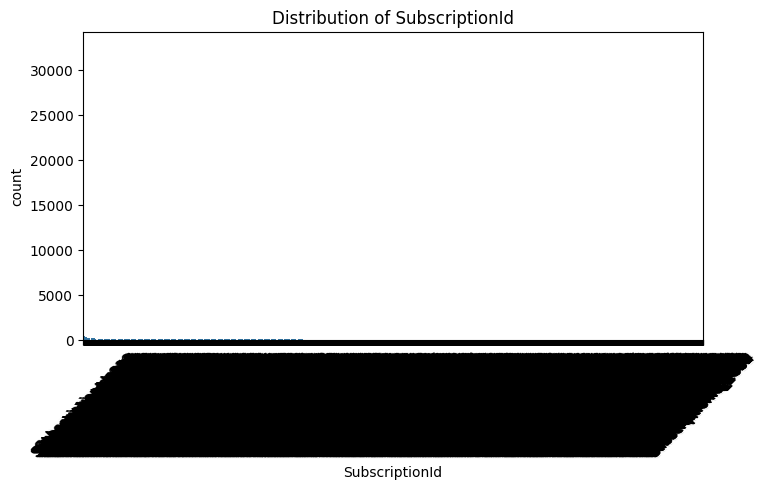

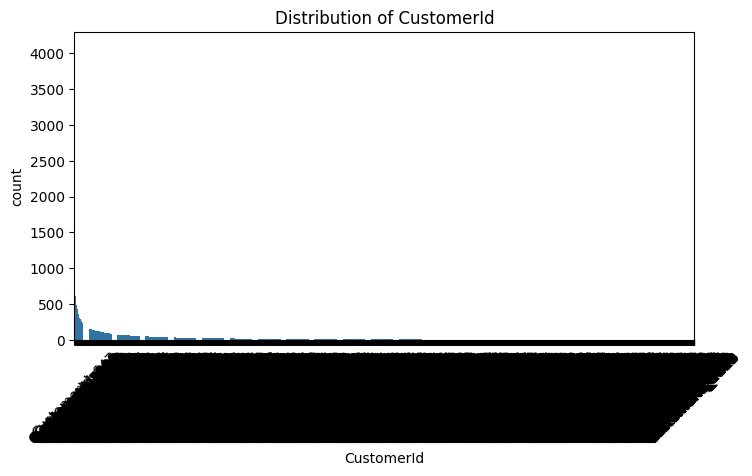

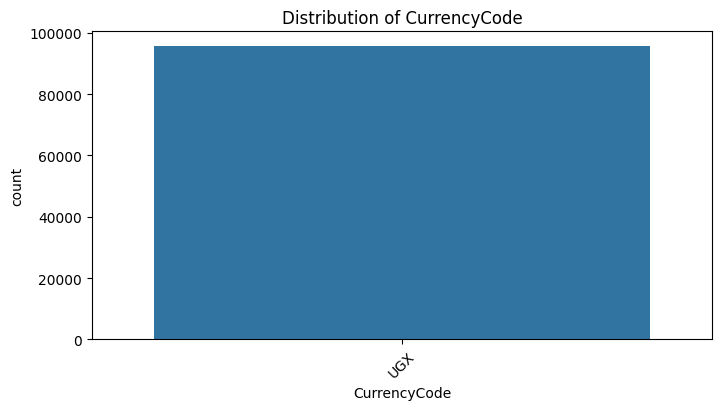

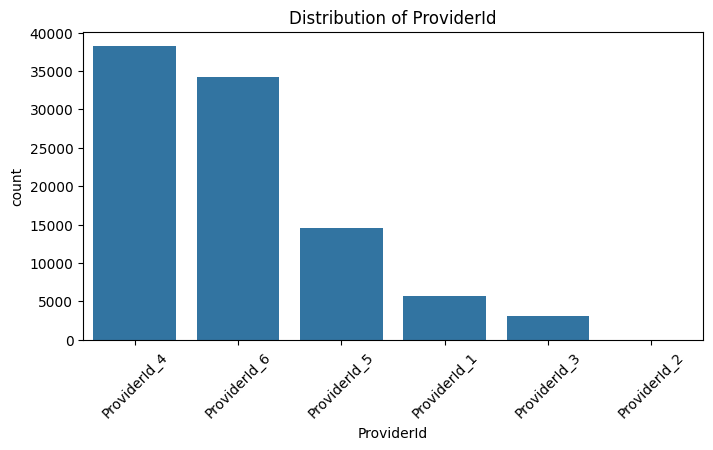

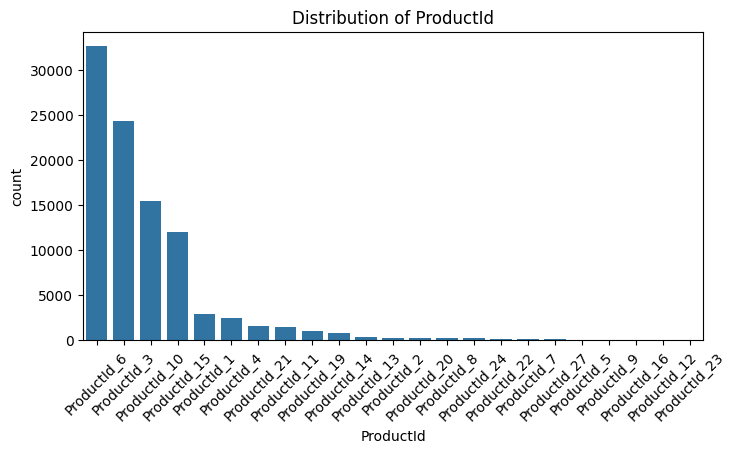

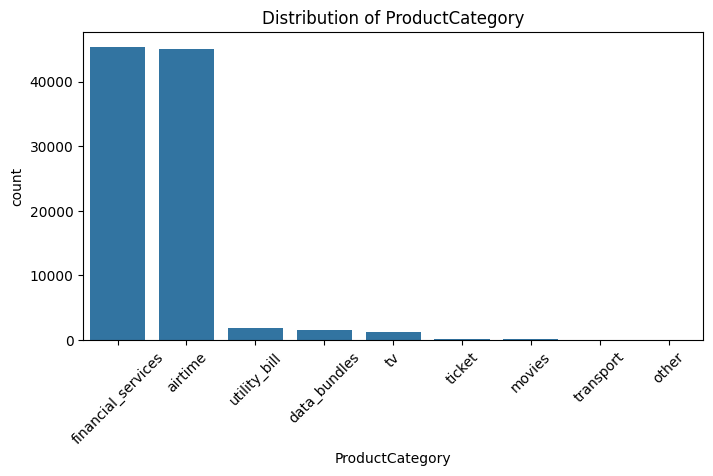

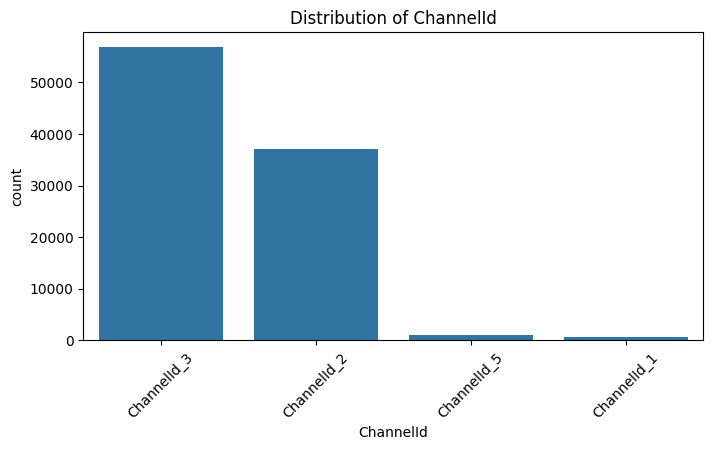

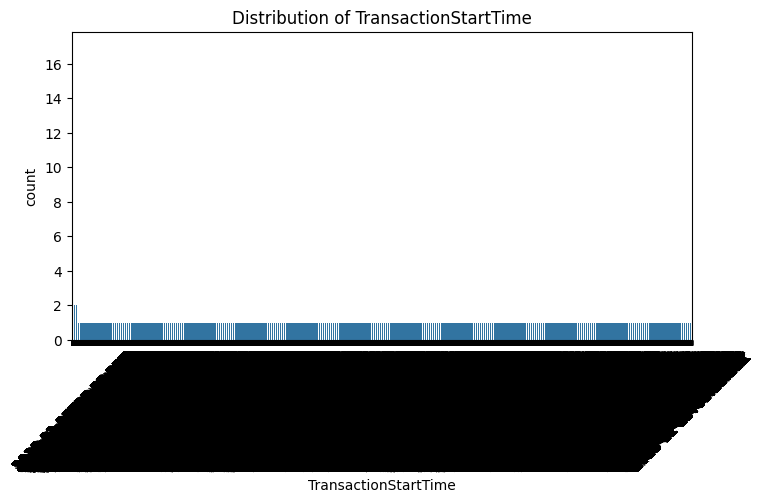


--- Correlation Analysis ---


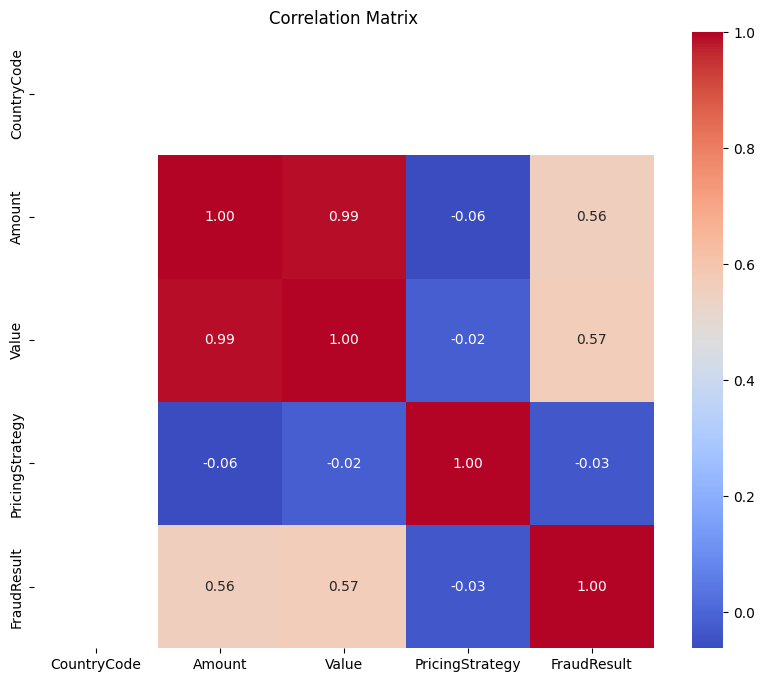


--- Outlier Detection ---


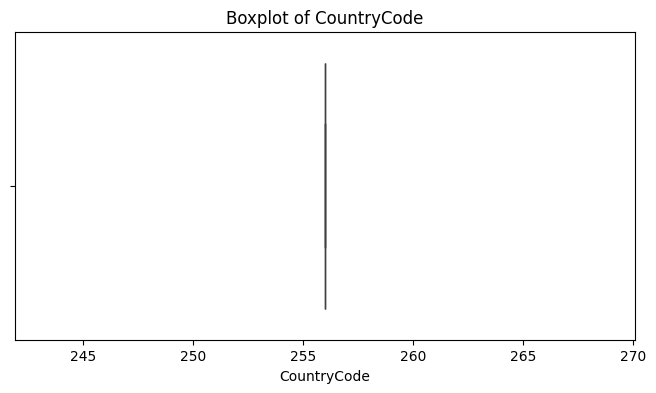

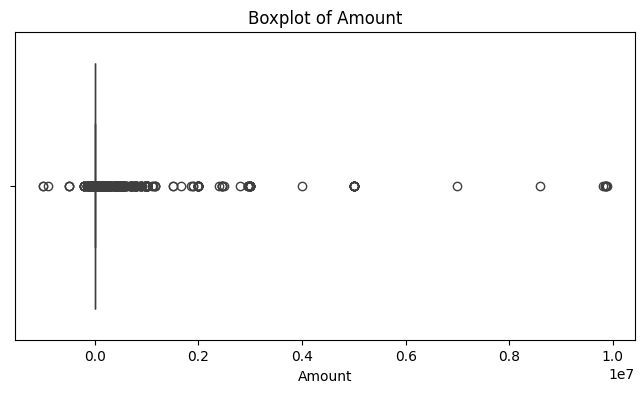

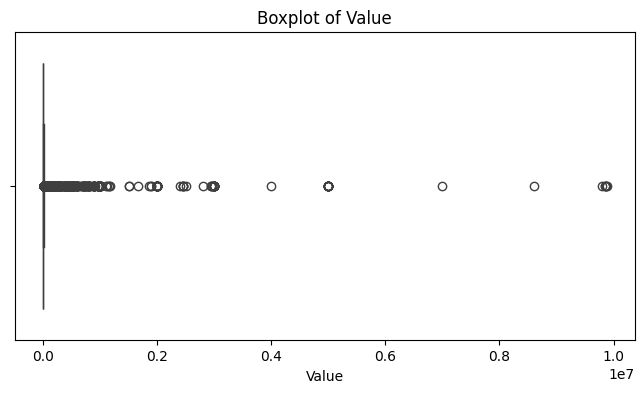

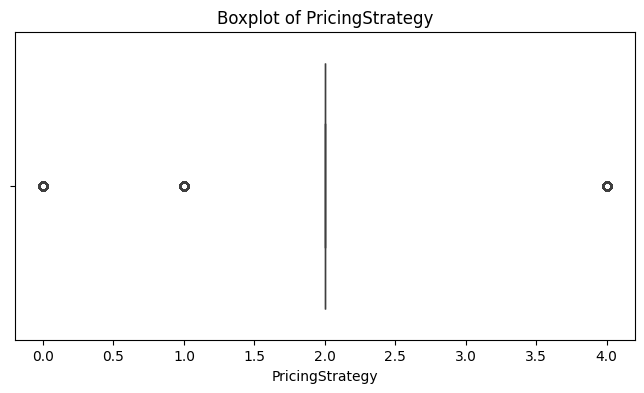

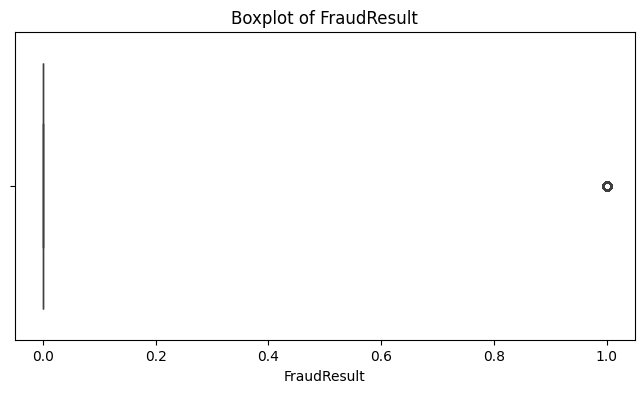

EDA completed successfully!


In [9]:
perform_eda(df)


--- Creating Aggregate Features ---

--- Extracting Date-Based Features ---

--- Encoding Categorical Variables ---

--- Handling Missing Values ---

--- Normalizing/Standardizing Numerical Features ---

--- Feature Engineering with WOE ---
Feature Engineering completed successfully!


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,woe_WOE_BatchId,woe_WOE_AccountId,woe_WOE_SubscriptionId,woe_WOE_CustomerId,woe_WOE_CurrencyCode,woe_WOE_ProviderId,woe_WOE_ProductId,woe_WOE_ProductCategory,woe_WOE_ChannelId,woe_WOE_TransactionStartTime
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,0.0,ProviderId_6,ProductId_10,airtime,...,-4.66104,-8.841338,-8.841338,-9.430743,0.0,-3.136999,-1.645064,-1.620378,0.472374,-4.66104
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,0.0,ProviderId_4,ProductId_6,financial_services,...,-4.66104,-4.134367,-4.189071,-9.430743,0.0,-2.736864,-4.189224,0.565446,-2.709034,-4.66104
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,0.0,ProviderId_6,ProductId_1,airtime,...,-4.66104,-5.349448,-5.349448,-5.349448,0.0,-3.136999,-12.618822,-1.620378,0.472374,-4.66104
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,0.0,ProviderId_1,ProductId_21,utility_bill,...,-4.66104,-7.910002,-7.910002,-8.289376,0.0,1.618898,0.271620,1.134959,0.472374,-4.66104
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,0.0,ProviderId_4,ProductId_6,financial_services,...,-4.66104,-4.134367,-4.189071,-8.289376,0.0,-2.736864,-4.189224,0.565446,-2.709034,-4.66104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,0.0,ProviderId_4,ProductId_6,financial_services,...,-4.66104,-4.134367,-4.189071,-11.002441,0.0,-2.736864,-4.189224,0.565446,-2.709034,-4.66104
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,0.0,ProviderId_6,ProductId_10,airtime,...,-4.66104,-7.947729,-7.947729,-8.412961,0.0,-3.136999,-1.645064,-1.620378,0.472374,-4.66104
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,0.0,ProviderId_4,ProductId_6,financial_services,...,-4.66104,-4.134367,-4.189071,-8.412961,0.0,-2.736864,-4.189224,0.565446,-2.709034,-4.66104
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,0.0,ProviderId_6,ProductId_19,tv,...,-4.66104,-10.509499,-10.509499,-10.913049,0.0,-3.136999,-11.523677,-11.805380,0.472374,-4.66104


In [2]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
from EDA import perform_eda

# perform_eda(df)

ImportError: cannot import name 'perform_eda' from 'EDA' (c:\Users\User\Desktop\Bank-Credit-Scoring-Model\src\EDA.py)